# Michele M. Crudele
# 2021858
## 3rd Set of Exercises

# Exercise 1

In [1]:
dtriangular <- function(x) { tr <- ifelse(2 <= x & x < 4,
                                      2 * (x - 2) / ((6 - 2)*(4 - 2)),
                                      ifelse(4 <= x & x <= 6, 
                                            2 * (6 - x)/((6-2)*(6-4)),
                                            0))
    return (tr)}

ptriangular <- function(x) { tr <- ifelse(x >= 2 & x < 4,
                                      1/2 - x/2 + (x^2)/8,
                                      ifelse(x <= 6,
                                             3/2*x - 1/8*x^2 -7/2,
                                             1.))
    return (tr) }

library(GoFKernel) # in order to use "inverse" function
qtriangular <- Vectorize(inverse(ptriangular, lower=2, upper=6))


rtriangular <- function(n) {
    return(qtriangular(runif(n)))
}

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


In [2]:
x <- seq(2, 6, 0.01)
y <- dtriangular(x)
options(repr.plot.width = 5, repr.plot.height = 4)

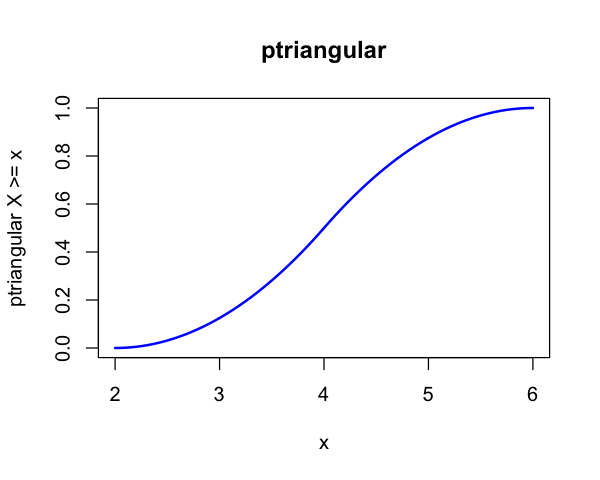

In [3]:
c <- ptriangular(x)
plot(x, c, main = 'ptriangular', type = 'l', col = "blue", lwd = 2, ylab = 'ptriangular X >= x')

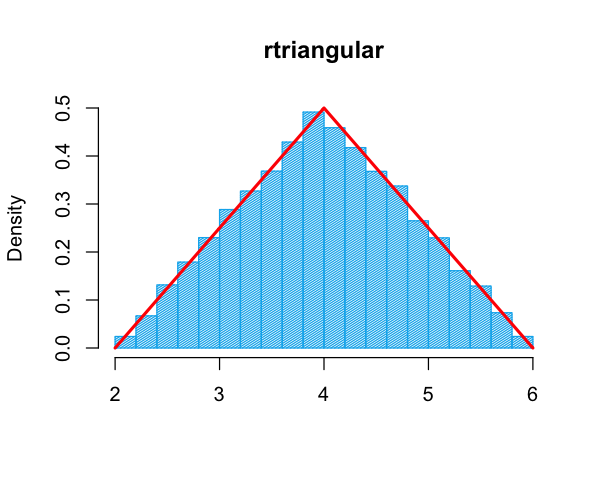

In [4]:
r <- rtriangular(10^4)
h <- hist(r, prob=TRUE, col = "deepskyblue2", density = 30, ylim = c(0,0.5), main = 'rtriangular', xlab = '')
lines(x, y, col="red", lwd=2.5)

# Exercise 2

In [5]:
leg <- function (x, y) { 
    legend(x, y,
    y.intersp=0.8,
    inset=0.1,
    legend=c(expression(P(X>=k)), "Markov's upper bound"),
    col=c("red", 'blue'), 
    pch = 19,
    pt.cex = 1.8, 
    cex = 0.9, 
    box.lty=0)
}

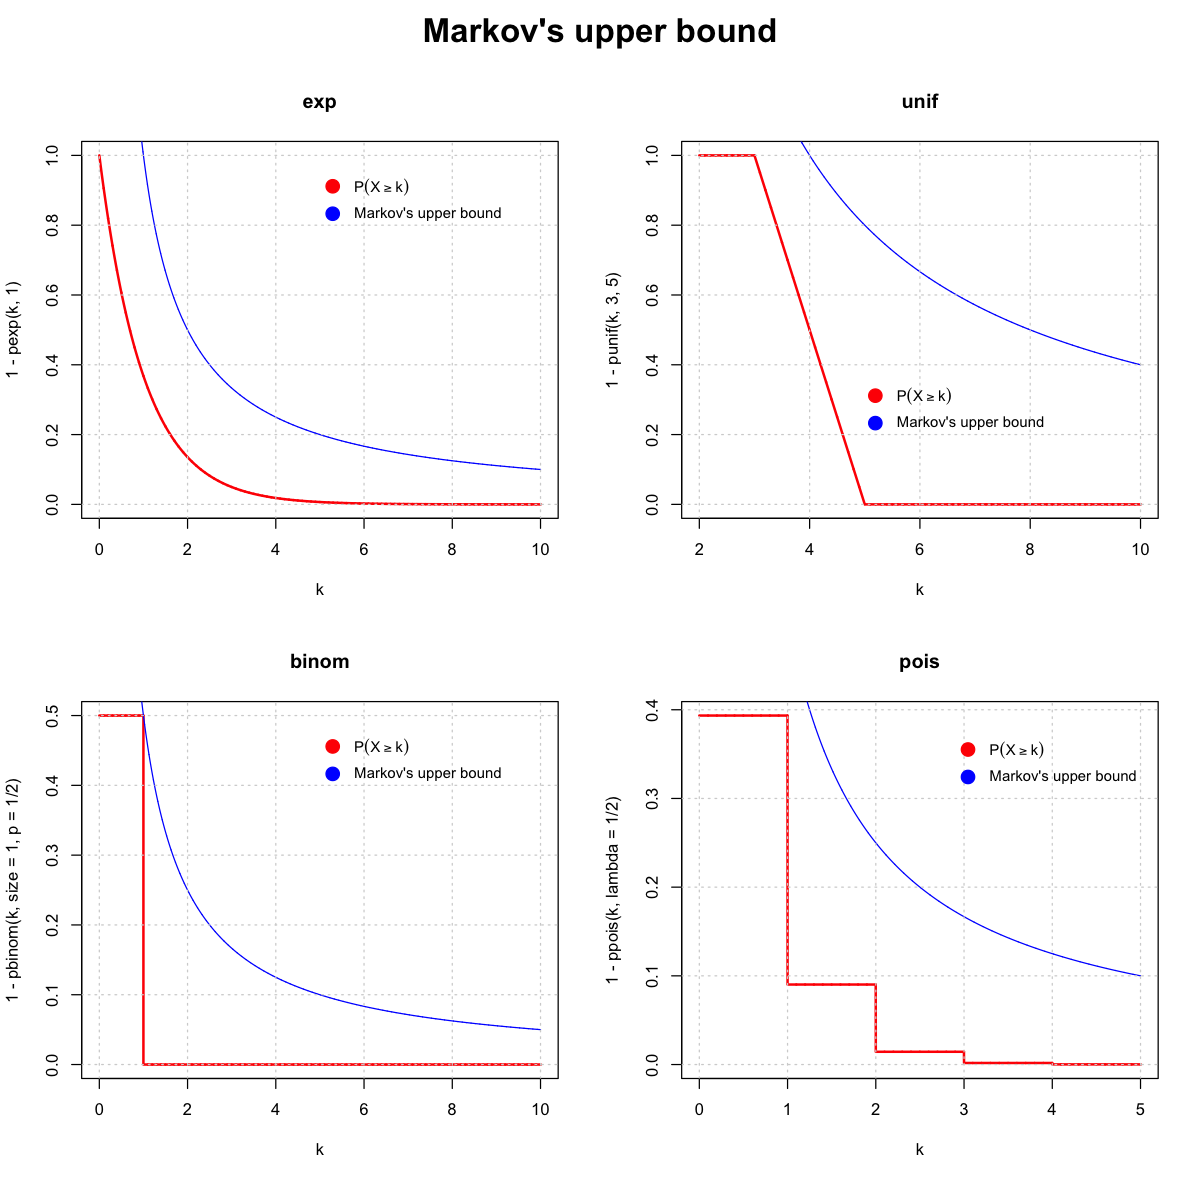

In [6]:
options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(2,2), oma=c(1,0,3,0))

k = seq(0, 10, 0.001)
plot(k, 1-pexp(k, 1), type = 'l', lwd = 2, col = "red", main="exp")
lines(k, 1/k, col = 'blue')
grid()
leg(4.8, 1)


k = seq(2, 10, 0.001)
plot(k, 1-punif(k, 3, 5), type = 'l', lwd = 2, col = "red", main="unif")
lines(k, 4/k, col = 'blue')
grid()
leg(4.8, 0.4)



k = seq(0, 10, 0.001)
plot(k, 1-pbinom(k, size = 1, p = 1/2), type = 'l', lwd = 2, col = "red", main="binom")
lines(k, 0.5/k, col = 'blue')
grid()
leg(4.8, 0.5)



k = seq(0, 5, 0.001)
plot(k, 1-ppois(k, lambda=1/2), type = 'l', lwd = 2, col = "red", main="pois")
lines(k, 0.5/k, col = 'blue')
grid()
leg(2.8, 0.39)


title("Markov's upper bound", outer = TRUE, cex.main=2)

# Exercise 3

In [7]:
lege = function () {legend("bottomright", 
       legend=c("P(|X - mu| >= k*sigma)","Chebyshev's bottom bound"),
       col=c("red", "blue"), 
       pch = 19,
       pt.cex = 2, 
       cex = 0.9, 
       box.lty=0)
}

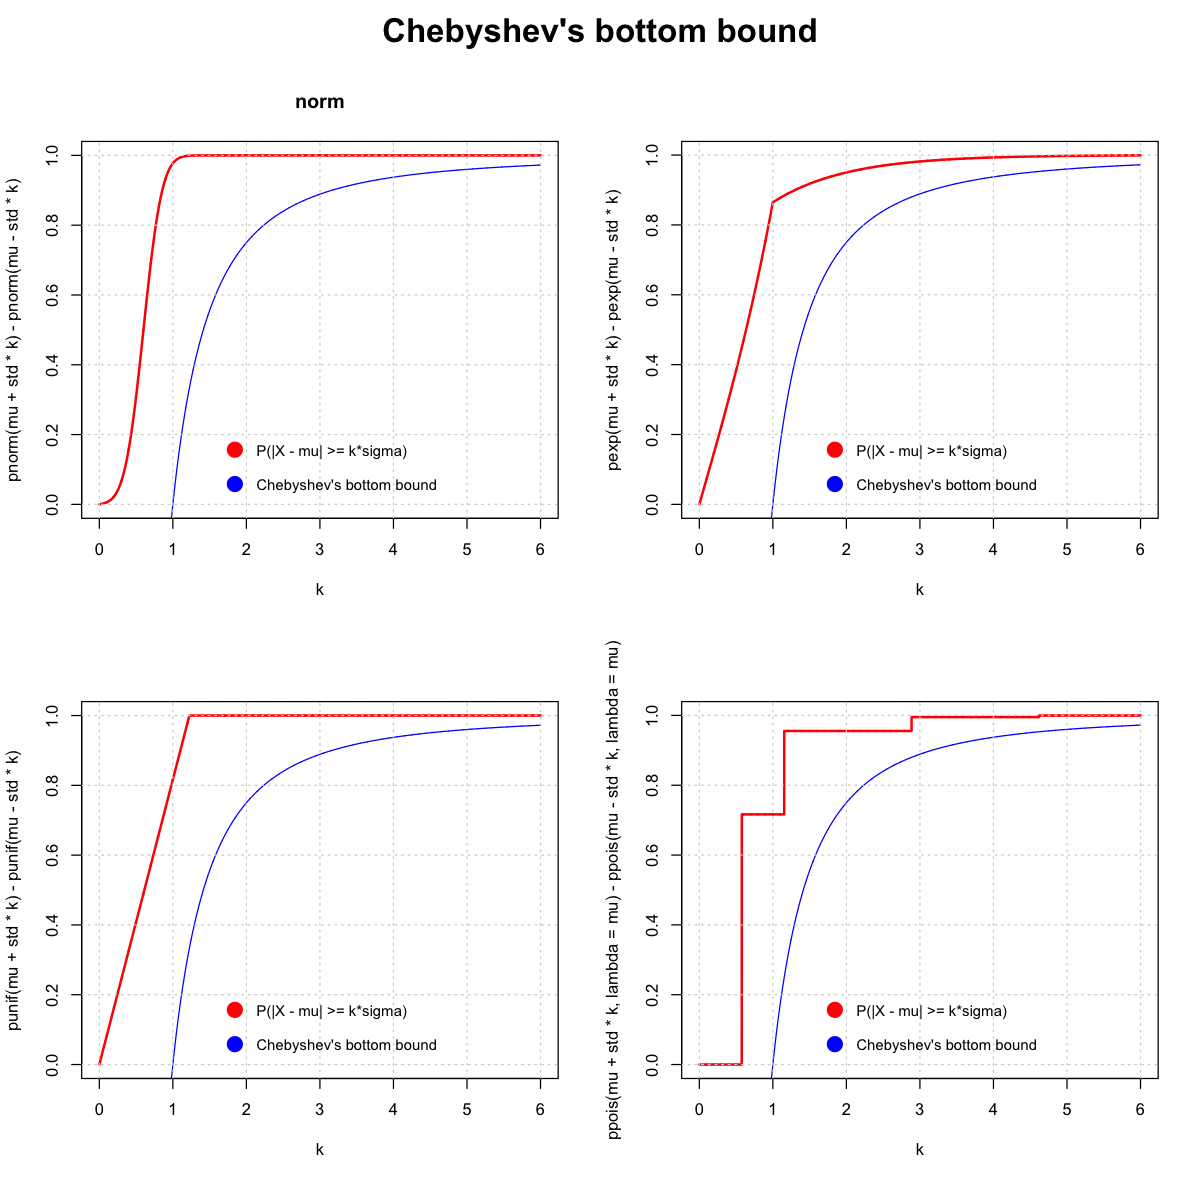

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(2,2), oma=c(1,0,3,0))
k = seq(0, 6, 0.001)

mu = 3
std = 5
plot(k, pnorm(mu+std*k) - pnorm(mu-std*k), type="l",col = "red", lwd = 2, xlim = c(0, 6), ylim = c(0,1), main="norm")
lines(k, 1 - 1/k^2, type = 'l', col = 'blue', lwd = 1)
grid()
lege()


mu = 1
std = 1
plot(k, pexp(mu+std*k) - pexp(mu-std*k), type="l", col = "red", lwd = 2)
lines(k, 1 - 1/k^2, type = 'l', col = 'blue', lwd = 1, xlim = c(0, 6), ylim = c(0,1), main="exp")
grid()
lege()


mu = 1
std = 2*sqrt(2)/sqrt(12)
plot(k, punif(mu+std*k) - punif(mu-std*k), type = "l", col = "red", lwd = 2)
lines(k, 1 - 1/k^2, type = 'l', col = 'blue', lwd = 1, xlim = c(0, 6), ylim = c(0,1), main="unif")
grid()
lege()


mu = 1/3
std = sqrt(1/3)
plot(k, ppois(mu+std*k, lambda=mu) - ppois(mu-std*k, lambda=mu), type = "l", col = "red", lwd = 2)
lines(k, 1 - 1/k^2, type = 'l', col = 'blue', lwd = 1, xlim = c(0, 6), ylim = c(0,1), main="pois")
grid()
lege()

title("Chebyshev's bottom bound", outer=TRUE, cex.main=2)

# Exercise 4

The analyzed database (https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip) contains files for different country related to the years 2020 and 2021.
The files contain the data related to the entire country in the first rows, then it contains the same data for all the different regions and subregions of that country in the following rows: as a consequence, in order to analyze the data of a country, we first have to merge the two files from 2020 and 2021 and then to select only the data related to the entire country, that is to say only the rows in which the columns related to regions and subregions are filled with NA values. Otherwise we would have different values for each day in the database.
Another problem is related to the mean on weeks and months: the lubridate::week and lubridate::months functions assign to each date the related week and month of the year; so, for example, the week related to the 21st of February 2020 is the same assigned to the 21st of February 2021; the same for the months. This represents a problem for computing the averages over weeks and  months, since the function "aggregate" computes them by considering the rows that have the same value in a specified columns. In order to deal with this problem, we add 12 to the months of 2021, and 53 to the weeks of 2021.

In [1]:
library(tidyverse)
library(purrr)
library(dplyr)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
read_my_csv <- function(years, country) {
    
    filename <- paste0(years, "_", country, "_Region_Mobility_Report.csv")
    
    temp <- tempfile()
    
    download.file("https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip", temp)
    
    data <- read_csv(unz(temp, filename), col_types = cols())
    
    unlink(temp)
    
    return(data)
    
    }

In [3]:
years <- 2020:2021

italy <- map_df(years, read_my_csv, country = "IT")
# select only data related to the entire nation i.e. sub_region_1 = NA
italy <- italy[is.na(italy$sub_region_1),]

In [7]:
dfw <- italy %>%
            select(date, (retail_and_recreation_percent_change_from_baseline:residential_percent_change_from_baseline)) 

dfw$weeks <- lubridate::week(dfw$date)
dfw$date <- NULL

mask.week = format(italy$date, format="%Y") == 2021
dfw$weeks[mask.week] = dfw$weeks[mask.week] + 53

In [8]:
head(dfw)

retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,weeks
3,-1,35,9,0,-1,7
3,2,26,11,1,-2,7
0,1,7,3,1,0,7
3,1,16,4,1,0,7
0,-1,11,3,1,0,8
2,1,18,5,1,0,8


In [11]:
weeks <- function(df) {
    
    dfw <- df %>%
            select(date, (retail_and_recreation_percent_change_from_baseline:residential_percent_change_from_baseline)) 

    # Set Weeks number. Date already of class `Date`
    dfw$weeks <- lubridate::week(dfw$date)
    dfw$date <- NULL

    mask.week = format(df$date, format="%Y") == 2021
    dfw$weeks[mask.week] = dfw$weeks[mask.week] + 53

    # Aggregate over week number
    dfw <- aggregate(.~weeks, FUN=mean, data=dfw, na.rm=TRUE)
    
    par(mfrow=c(3,2), oma=c(10,0,10,0))
    options(repr.plot.width=20, repr.plot.height=20)

    for (i in 2:ncol(dfw)) {
        plot(dfw$weeks, dfw[[i]], cex.axis = 2, cex.lab=1.8, type = 'b', 
             main = colnames(dfw)[i], xlab="week", ylab = "percent change from baseline", 
             cex.main = 2, col="darkblue", lwd = 3)
        grid()
    }
    
}

In [12]:
months <- function(df) {
    
    dfm <- df %>%
        select(date, (retail_and_recreation_percent_change_from_baseline:residential_percent_change_from_baseline)) 

    # Set Weeks number. Date already of class `Date`
    dfm$months <- lubridate::month(dfm$date)
    dfm$date <- NULL

    mask.month = format(df$date, format="%Y") == 2021
    dfm$months[mask.month] = dfm$months[mask.month] + 12

    # Aggregate over month number
    dfm <- aggregate(.~months, FUN=mean, data=dfm, na.rm=TRUE)
    
    par(mfrow=c(3,2), oma=c(10,0,10,0))
    options(repr.plot.width=20, repr.plot.height=20)

    for (i in 2:ncol(dfm)) {
        plot(dfm$months, dfm[[i]], cex.axis = 2, cex.lab=1.8, type = 'b', 
             main = colnames(dfm)[i], xlab="month", ylab = "percent change from baseline", 
             cex.main = 2, col="darkblue", lwd = 3)
        grid()
    }

}

In [4]:
years <- 2020:2021

italy <- map_df(years, read_my_csv, country = "IT")
# select only data related to the entire nation i.e. sub_region_1 = NA
italy <- italy[is.na(italy$sub_region_1),]

## ITALY per week

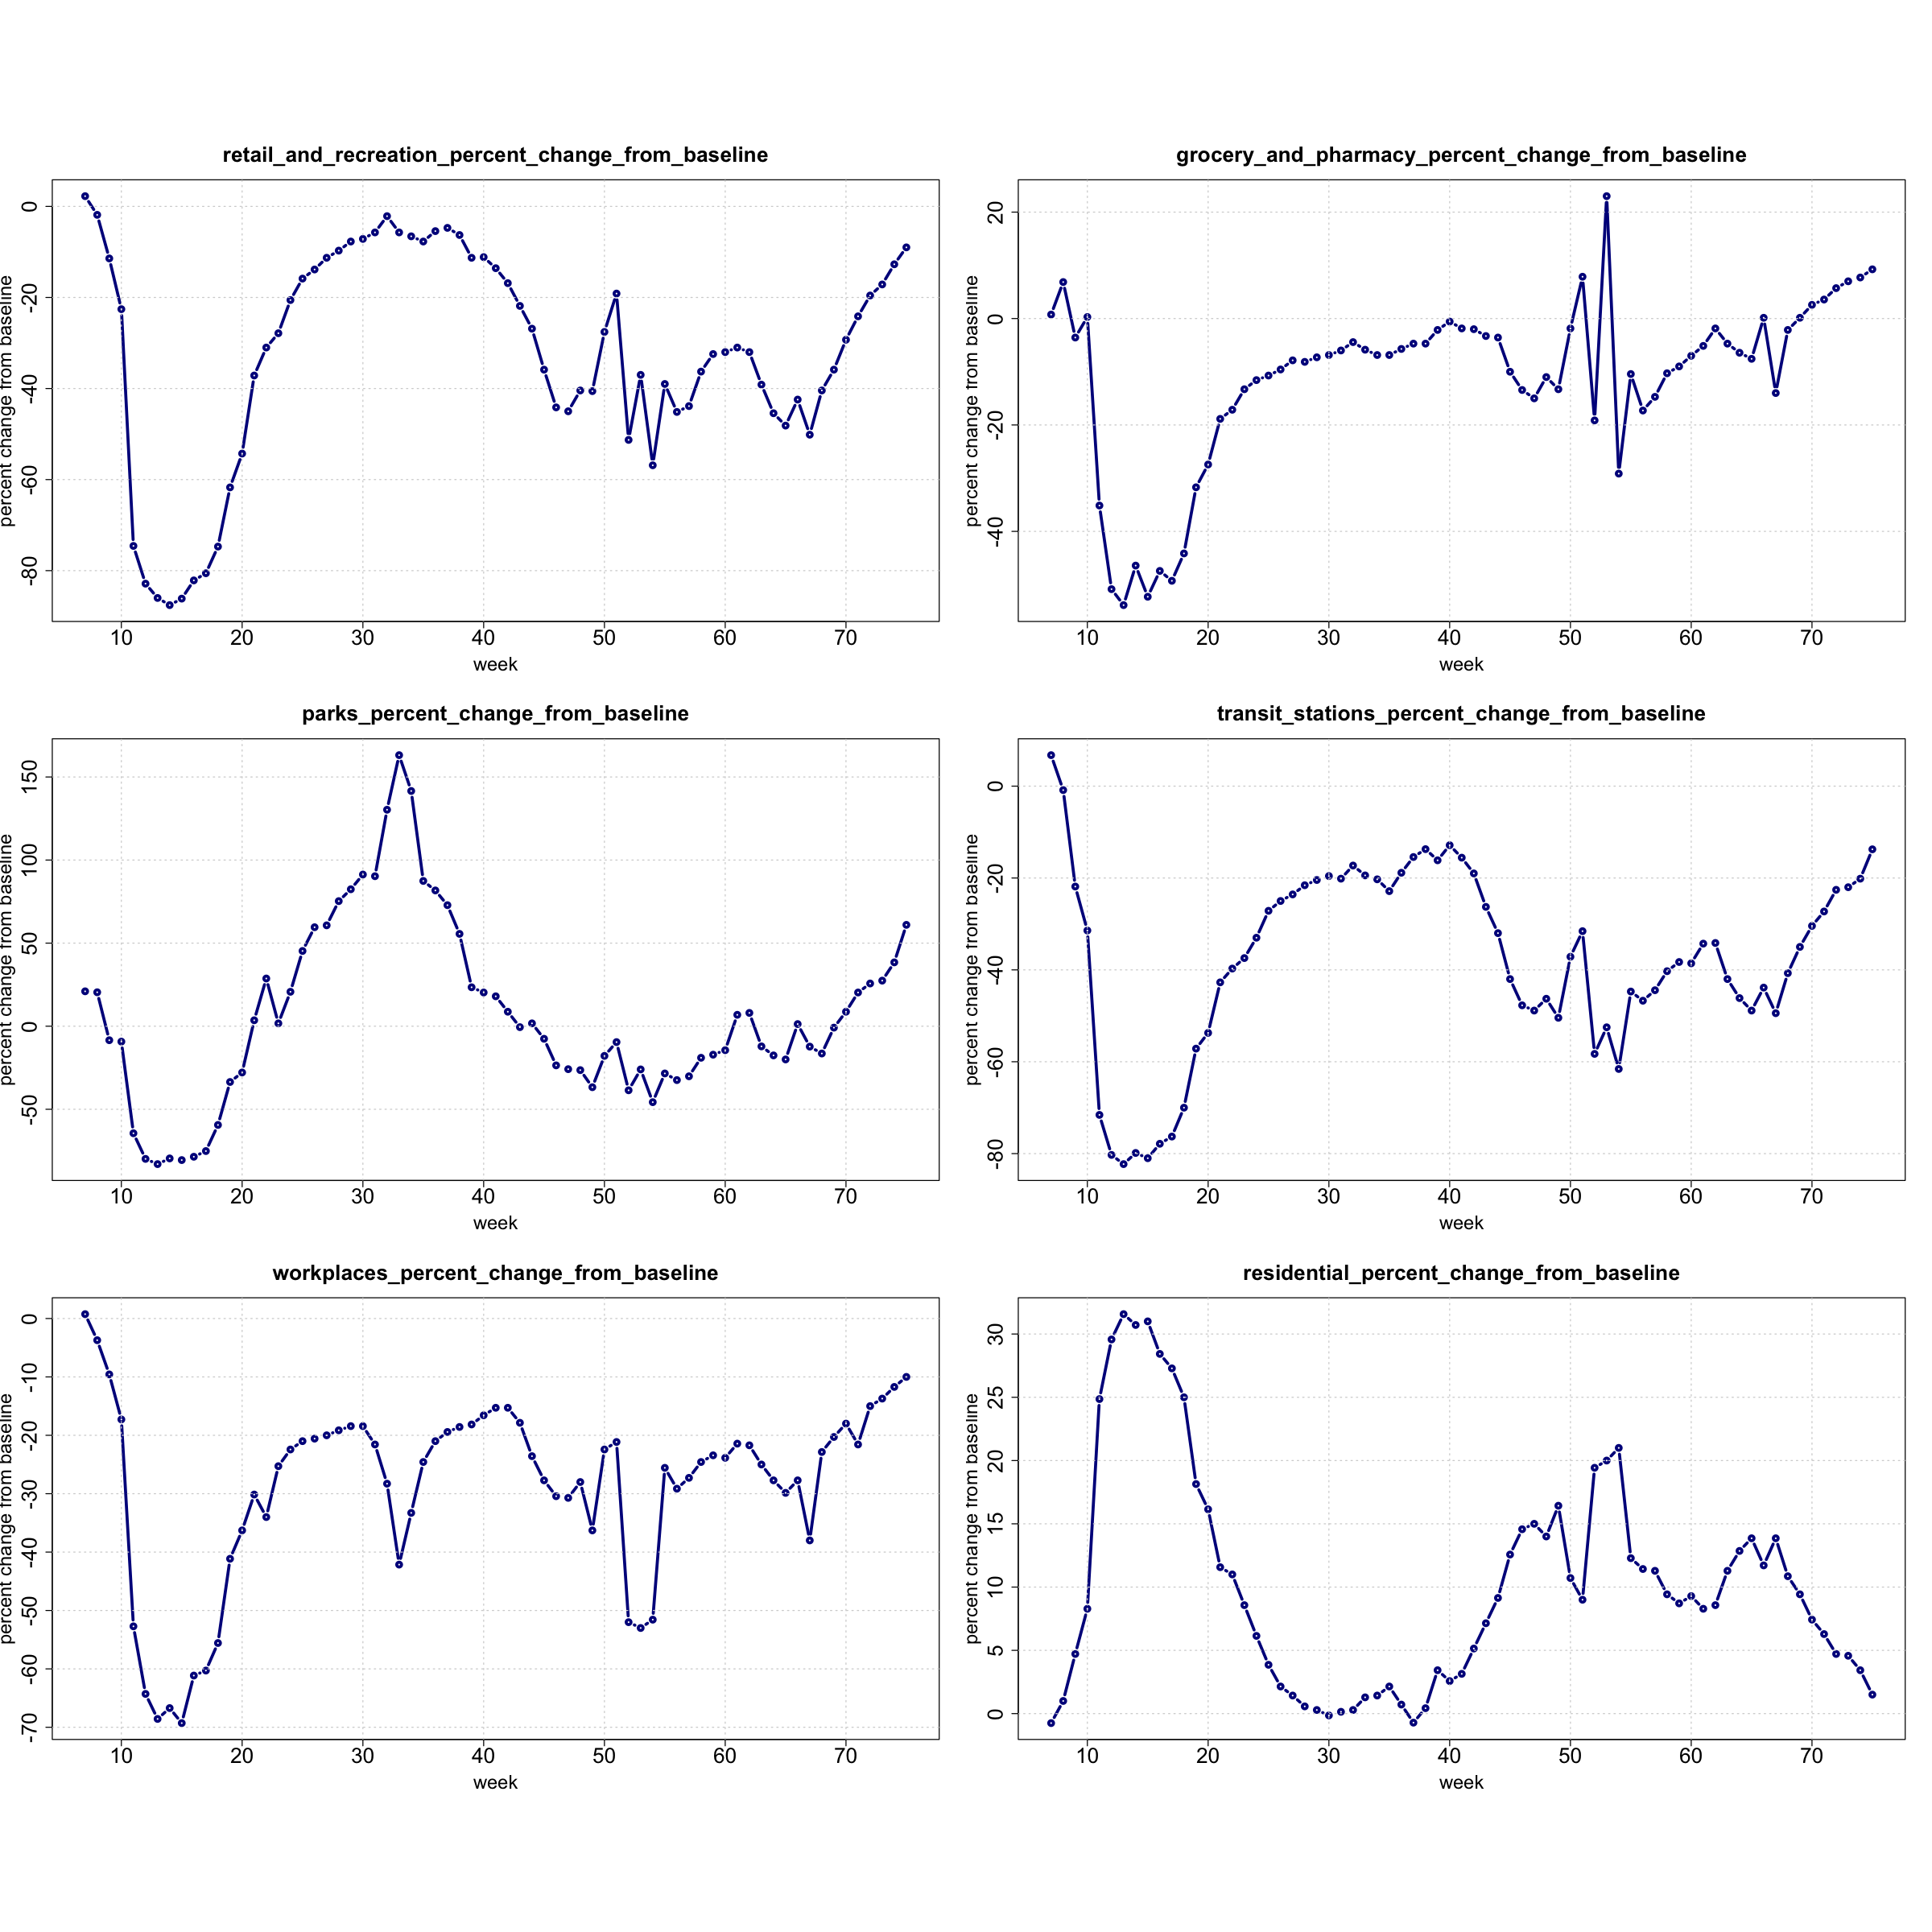

In [14]:
weeks(italy)

## ITALY per month

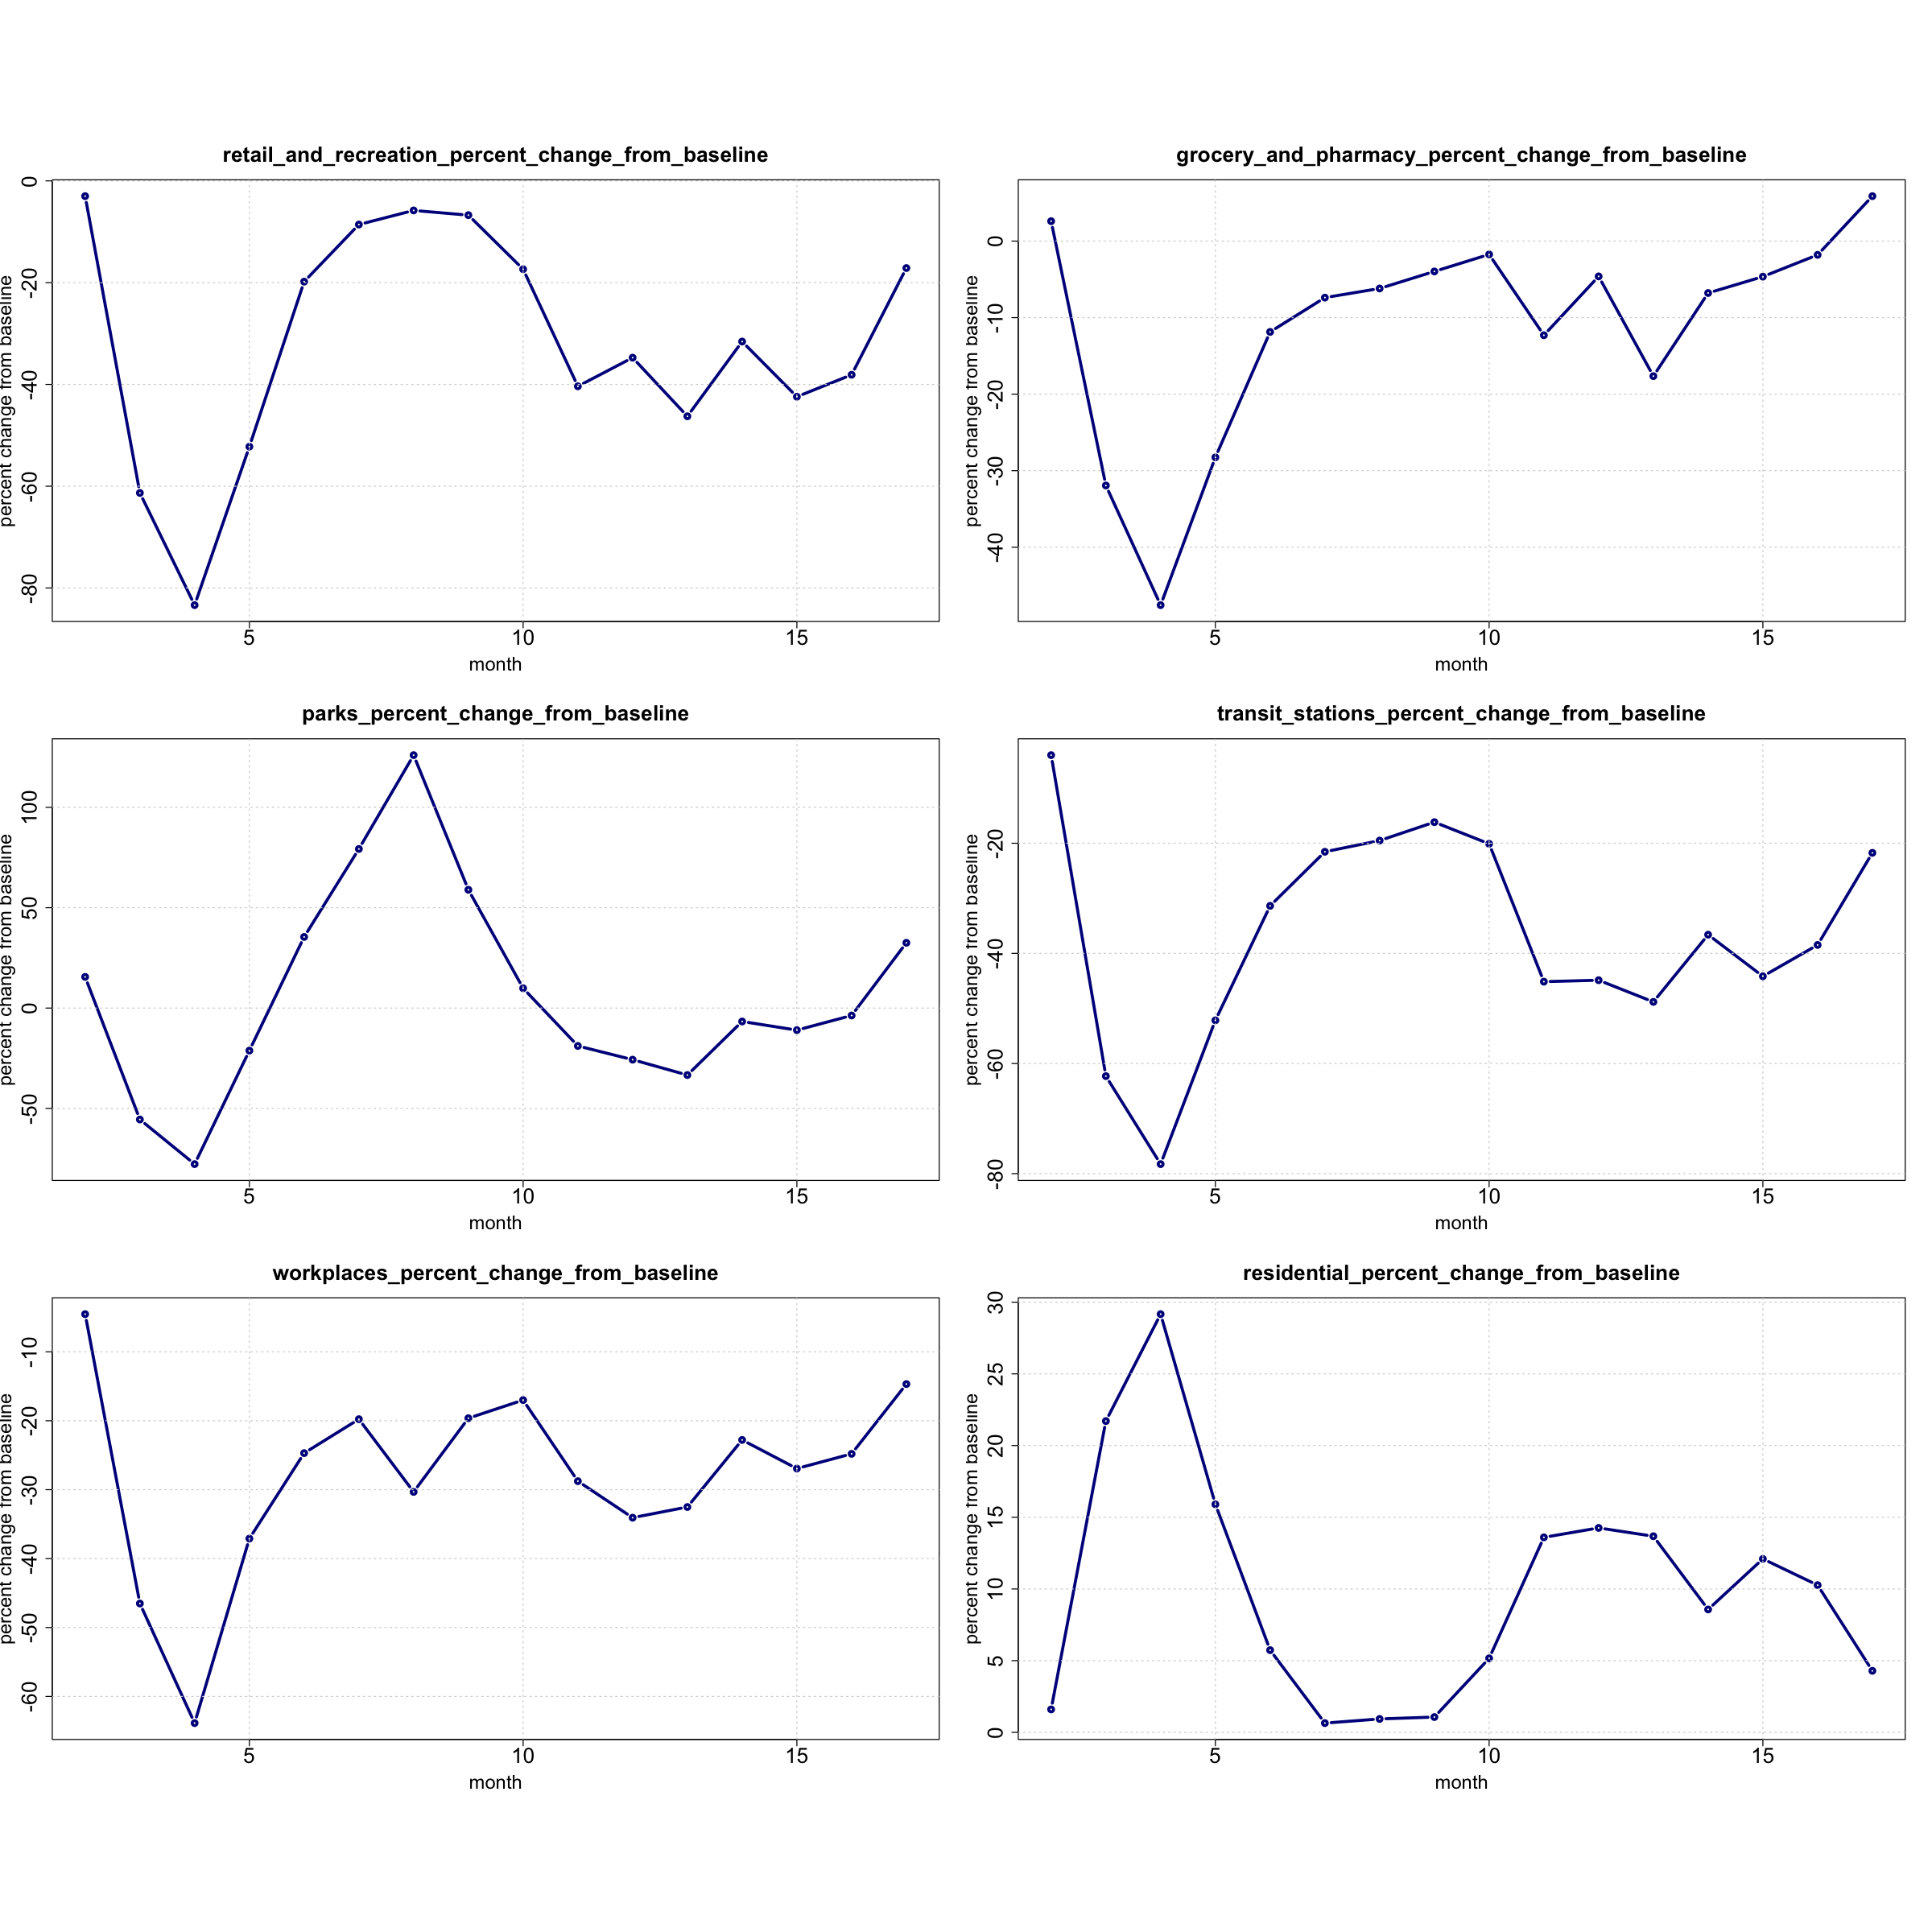

In [15]:
months(italy)

In [16]:
years <- 2020:2021

france <- map_df(years, read_my_csv, country = "FR")

# select only data related to the entire nation i.e. sub_region_1 = NA
france <- france[is.na(france$sub_region_1),]

## France per week

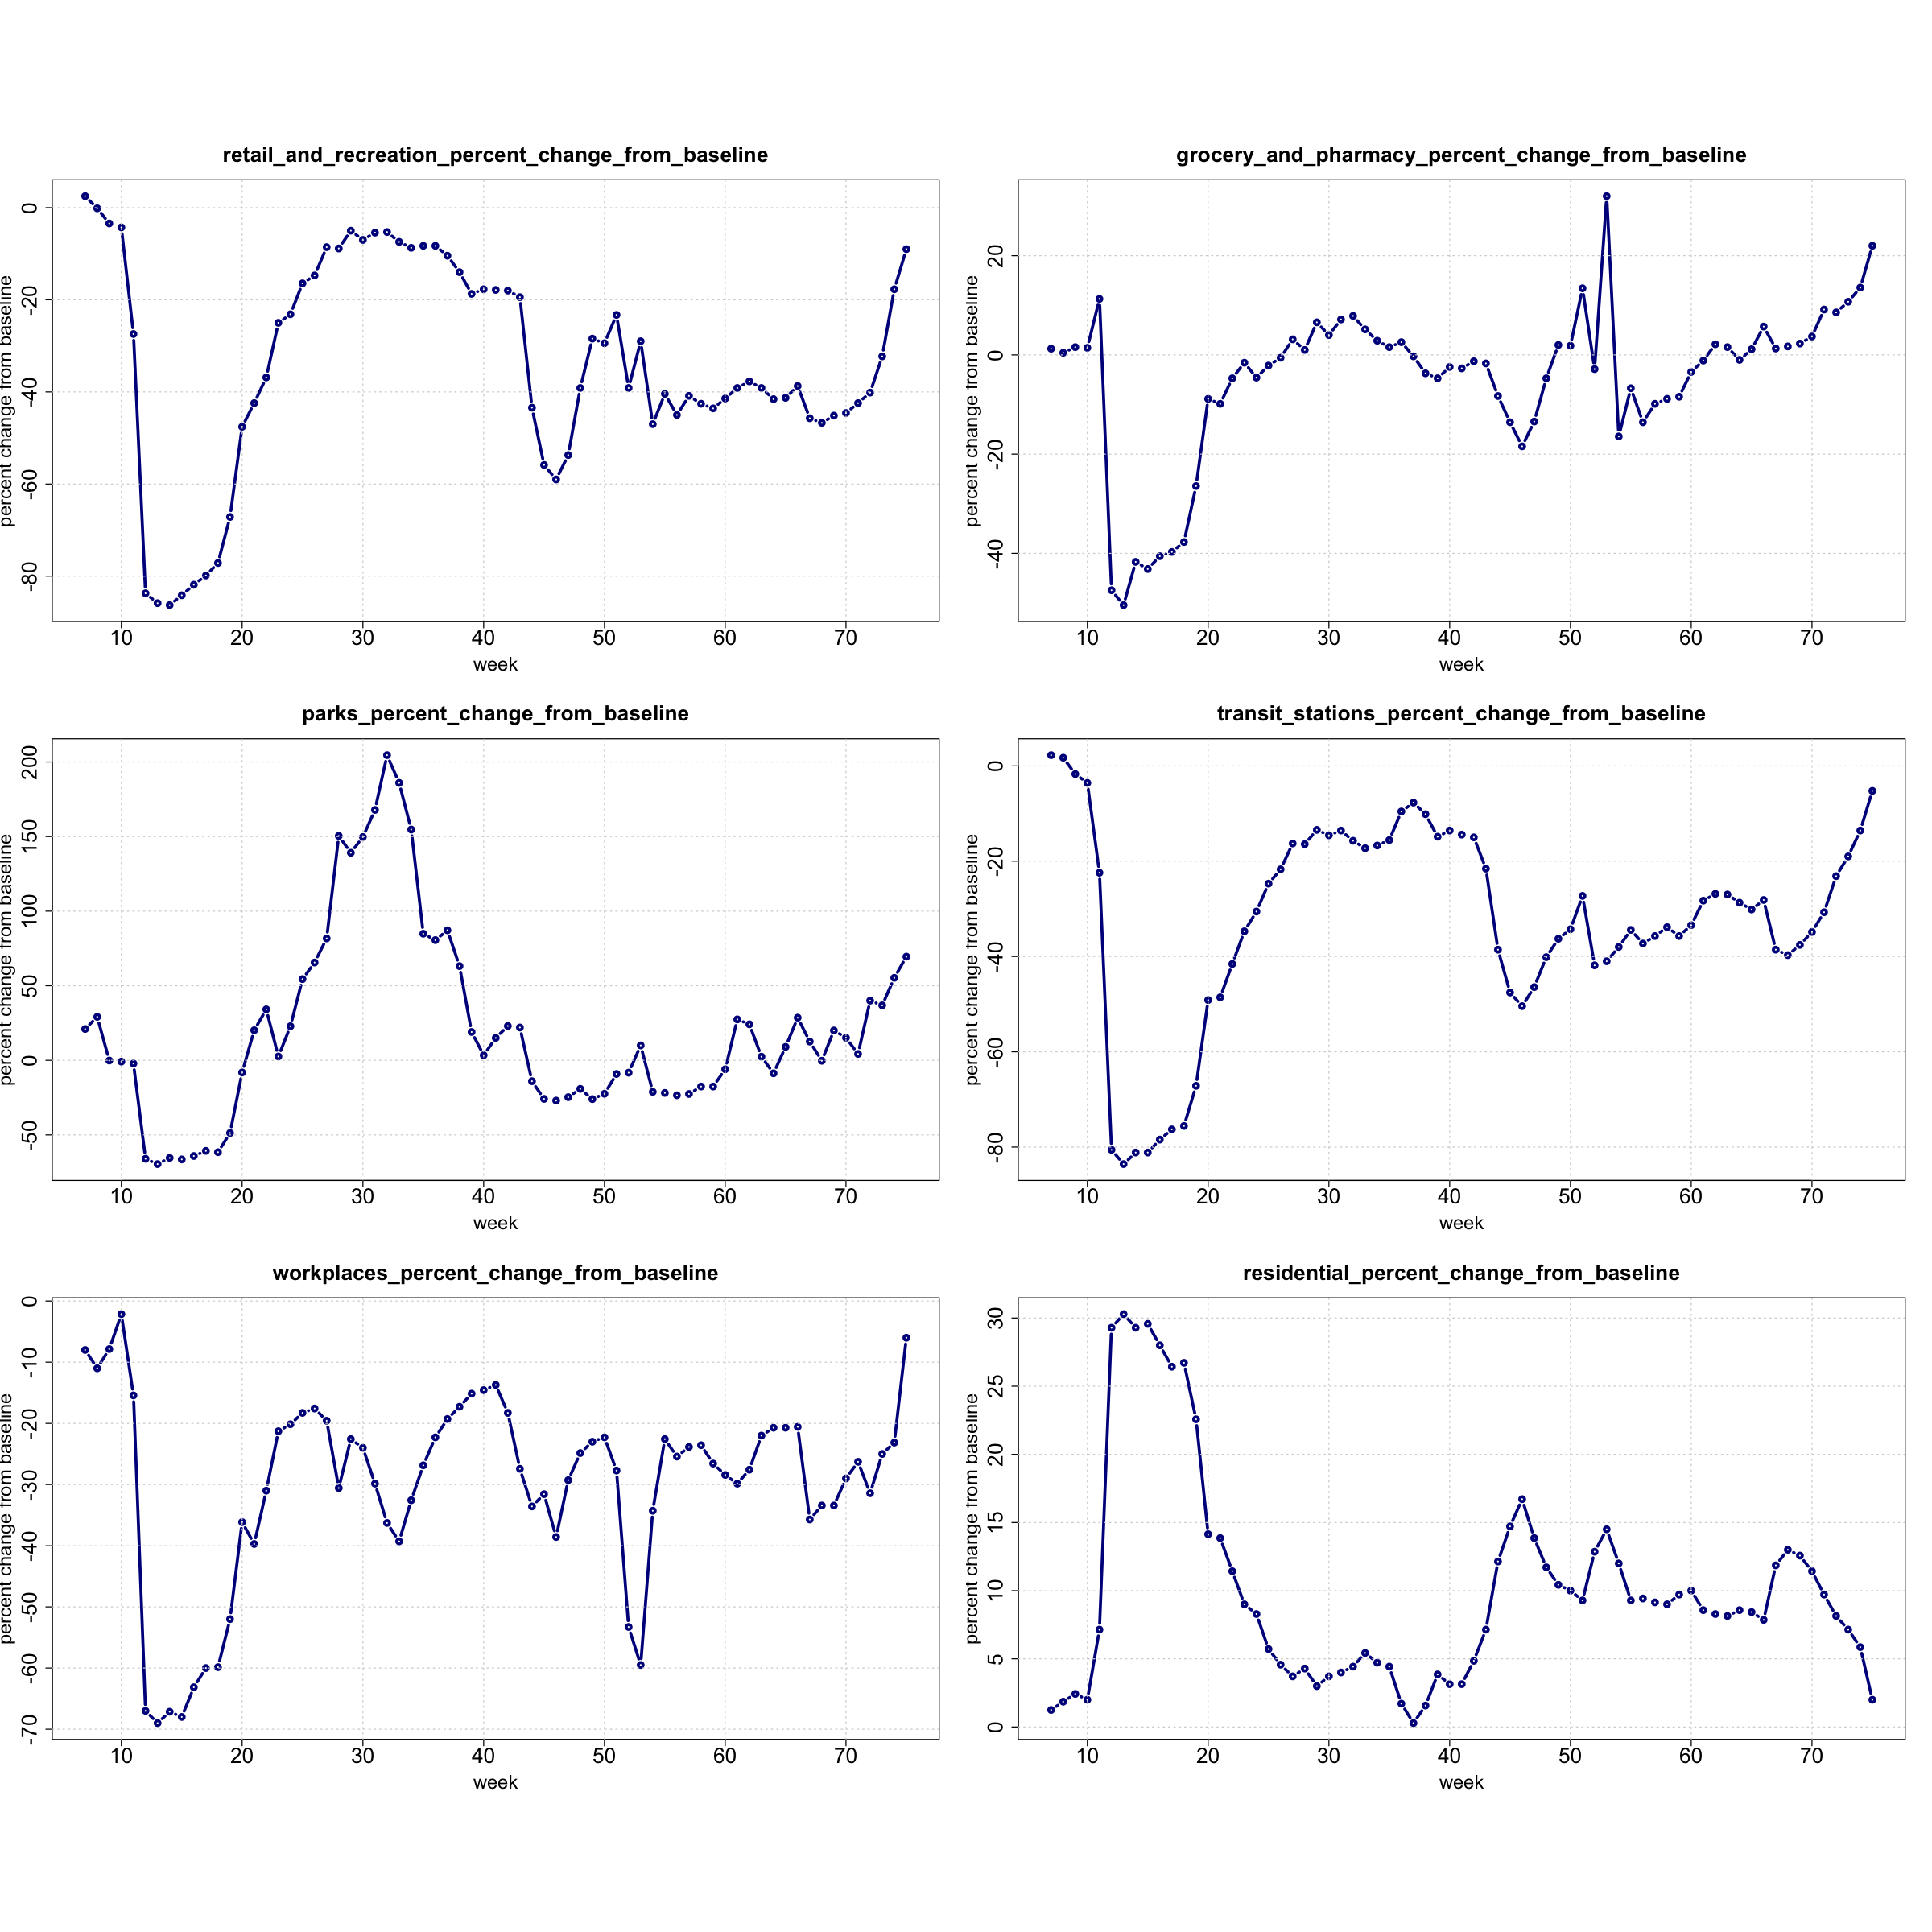

In [17]:
weeks(france)

## FRANCE per month

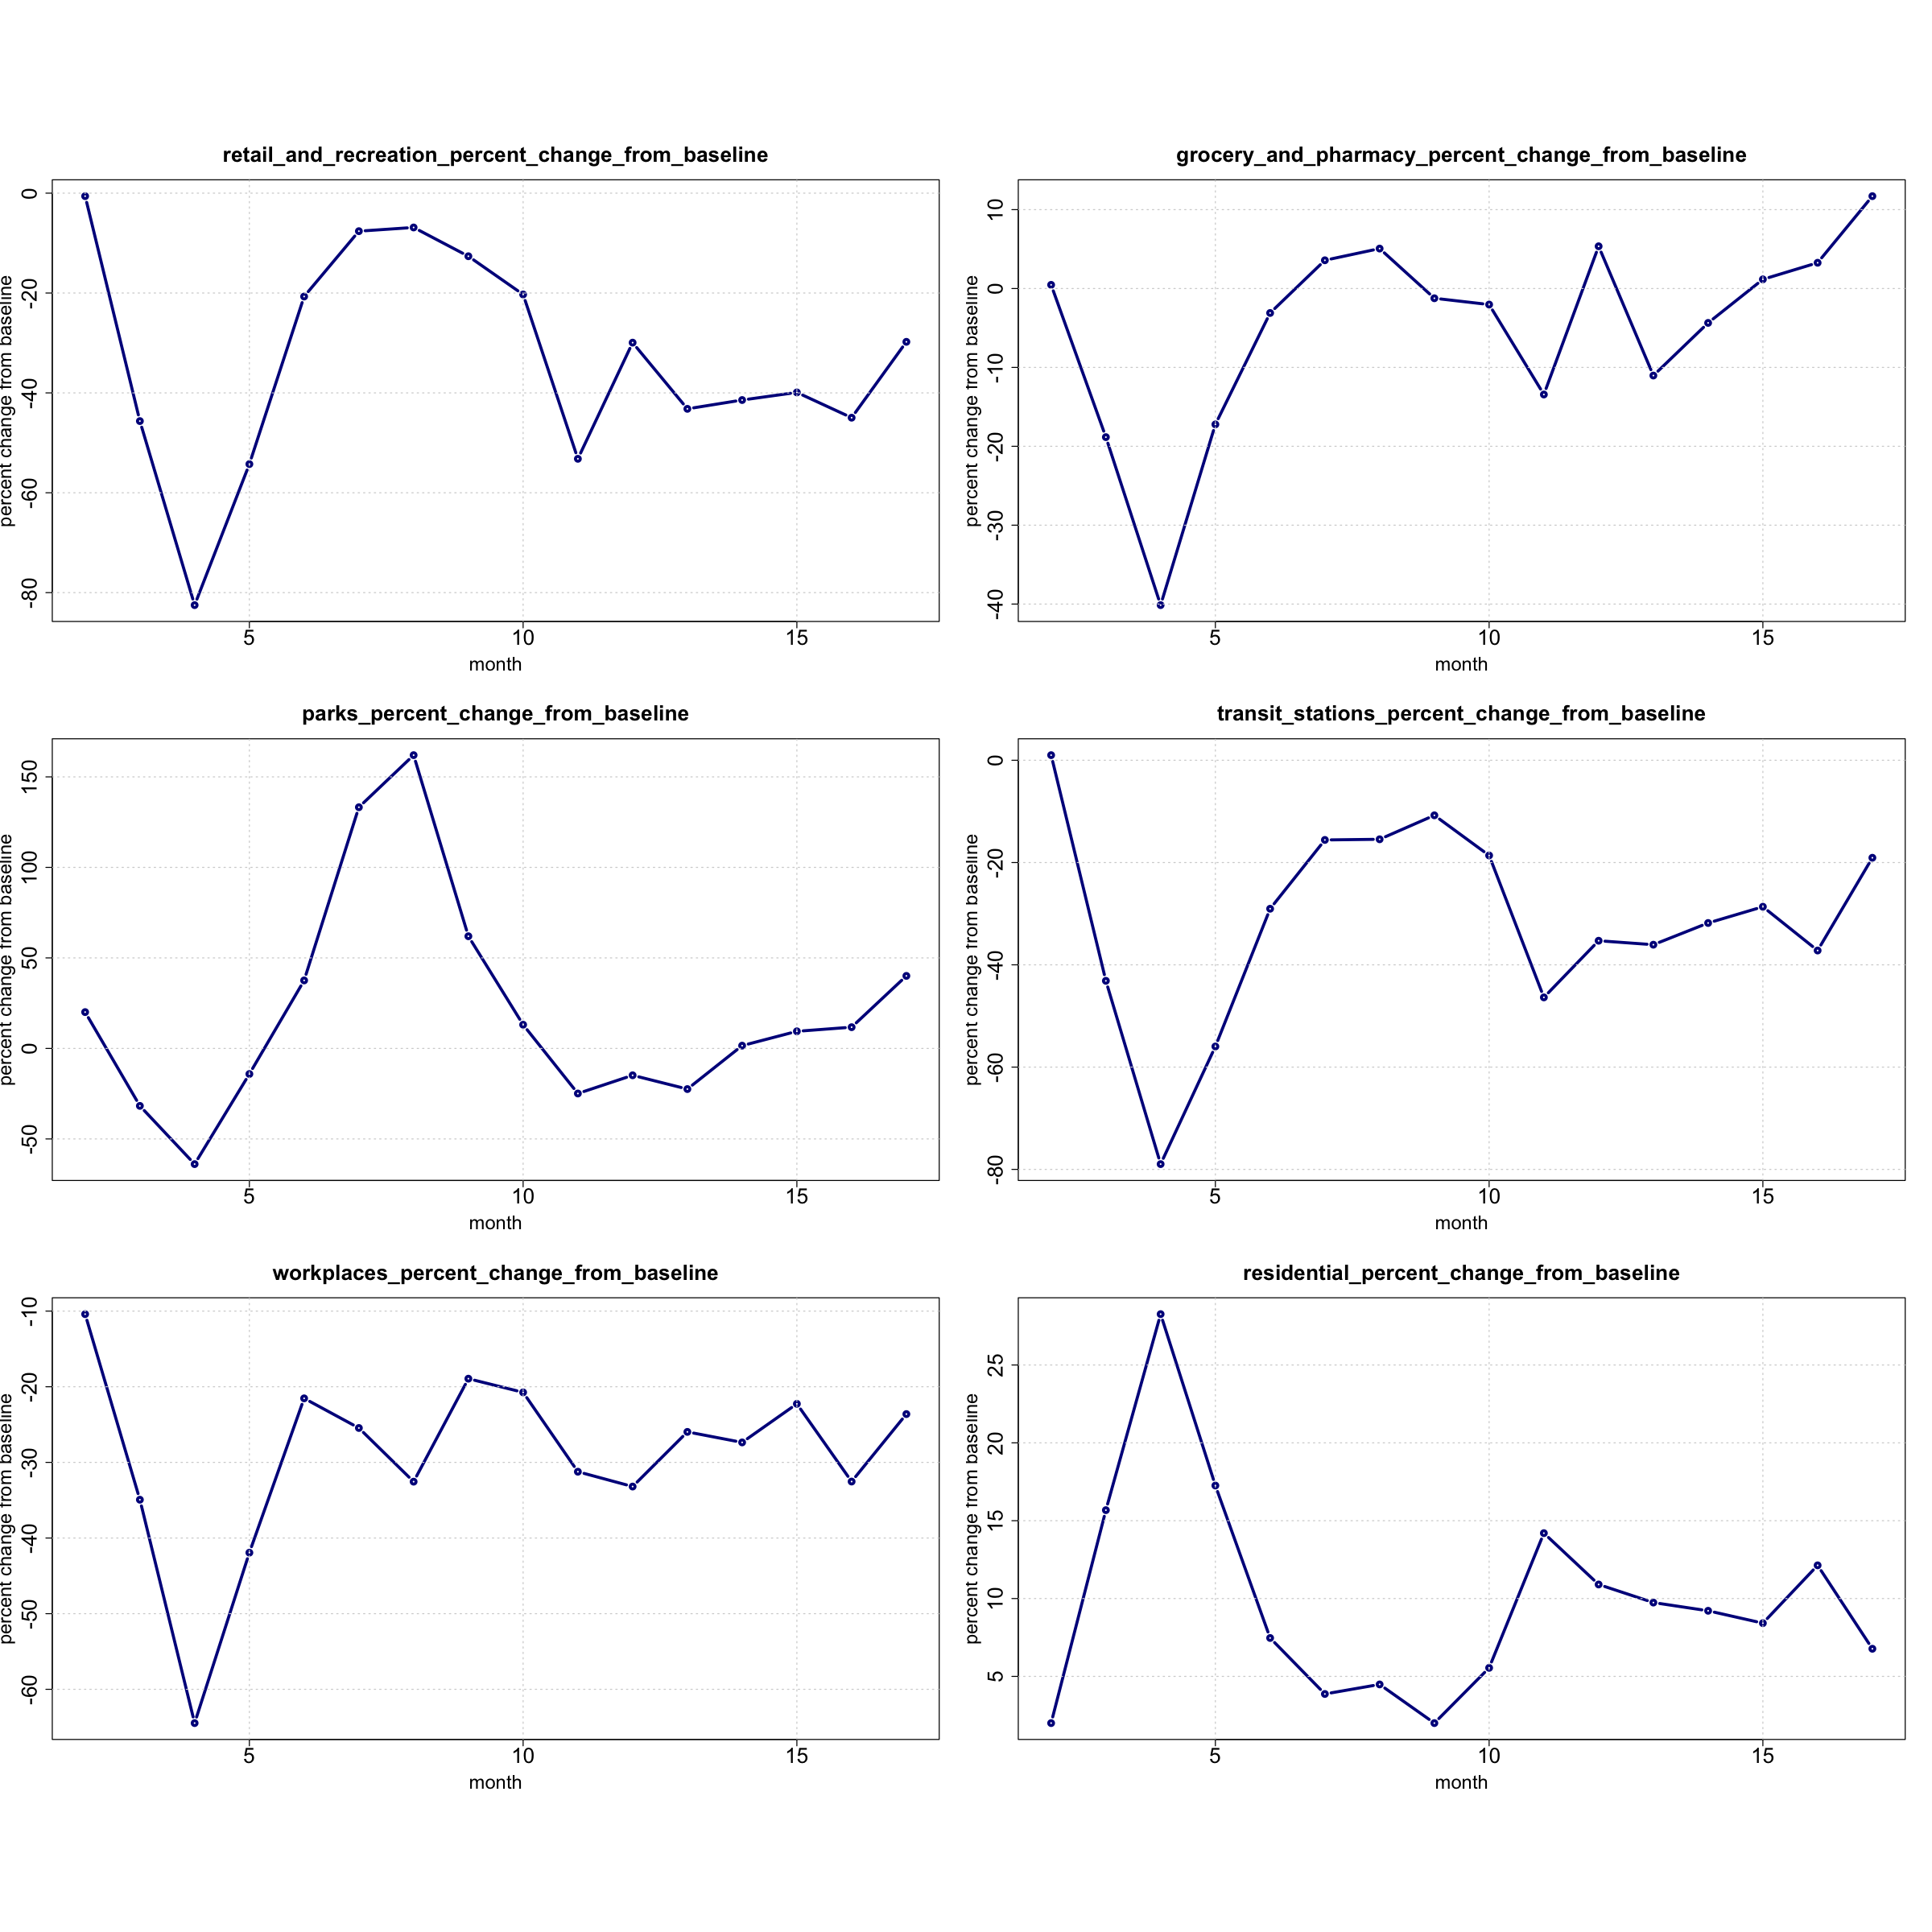

In [18]:
months(france)

In [19]:
Category <- colnames(italy)[10:length(colnames(italy))]

Integral_IT <- c()
for (i in 10:ncol(italy)) {
    Integral_IT <- c(Integral_IT, sum(italy[[i]]))
}

Integral_FR <- c()
for (i in 10:ncol(france)) {
    Integral_FR <- c(Integral_FR, sum(france[[i]]))
}

spain <- map_df(years, read_my_csv, country = "ES")
# select only data related to the entire nation i.e. sub_region_1 = NA
spain <- spain[is.na(spain$sub_region_1),]
Integral_ES <- c()
for (i in 10:ncol(spain)) {
    Integral_ES <- c(Integral_ES, sum(spain[[i]]))
}

Germany <- map_df(years, read_my_csv, country = "DE")
# select only data related to the entire nation i.e. sub_region_1 = NA
Germany <- Germany[is.na(Germany$sub_region_1),]
Integral_DE <- c()
for (i in 10:ncol(Germany)) {
    Integral_DE <- c(Integral_DE, sum(Germany[[i]]))
}

cat("The impact of COVID-19 restrictions on mobility situations has been (in percentage):")
tibble(Category, Integral_IT, Integral_FR, Integral_ES, Integral_DE)

The impact of COVID-19 restrictions on mobility situations has been (in percentage):

Category,Integral_IT,Integral_FR,Integral_ES,Integral_DE
retail_and_recreation_percent_change_from_baseline,-15441,-16191,-17127,-13694
grocery_and_pharmacy_percent_change_from_baseline,-5469,-2444,-4176,-1124
parks_percent_change_from_baseline,2995,9533,-1393,23044
transit_stations_percent_change_from_baseline,-17758,-15248,-16523,-14029
workplaces_percent_change_from_baseline,-13585,-14063,-13205,-10466
residential_percent_change_from_baseline,4808,4773,4385,3740
